##Ejercicio 2

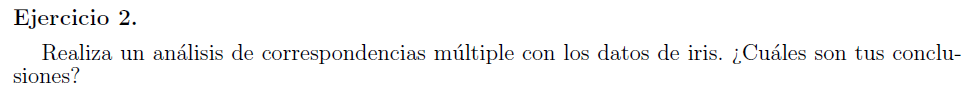

In [ ]:
pip install prince    #Instalar de ser necesario

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.6/415.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import prince

# Cargar el conjunto de datos de iris
iris = sns.load_dataset('iris')

# Mostrar las primeras filas del conjunto de datos
print("Datos originales:")
print(iris.head())

Datos originales:
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [ ]:
# Convertir características numéricas a categóricas
iris['sepal_length_cat'] = pd.qcut(iris['sepal_length'], q=3, labels=['corto', 'medio', 'largo'])
iris['sepal_width_cat'] = pd.qcut(iris['sepal_width'], q=3, labels=['estrecho', 'medio', 'ancho'])
iris['petal_length_cat'] = pd.qcut(iris['petal_length'], q=3, labels=['corto', 'medio', 'largo'])
iris['petal_width_cat'] = pd.qcut(iris['petal_width'], q=3, labels=['estrecho', 'medio', 'ancho'])

# Seleccionar solo las columnas categóricas
iris_cat = iris[['sepal_length_cat', 'sepal_width_cat', 'petal_length_cat', 'petal_width_cat', 'species']]

print("Datos categóricos:")
print(iris_cat.head())

Datos categóricos:
  sepal_length_cat sepal_width_cat petal_length_cat petal_width_cat species
0            corto           ancho            corto        estrecho  setosa
1            corto           medio            corto        estrecho  setosa
2            corto           medio            corto        estrecho  setosa
3            corto           medio            corto        estrecho  setosa
4            corto           ancho            corto        estrecho  setosa


In [ ]:
# Crear el modelo MCA
mca = prince.MCA(
    n_components=2,
    n_iter=3,
    copy=True,
    check_input=True,
    engine='scipy',
    random_state=42
)

# Ajustar el modelo a los datos categóricos
mca = mca.fit(iris_cat)

# Transformar los datos
mca_transformed = mca.transform(iris_cat)

# Obtener las coordenadas de las filas
rows_coords = mca.row_coordinates(iris_cat)

# Obtener las coordenadas de las columnas
cols_coords = mca.column_coordinates(iris_cat)

# Imprimir los resultados
print("\nCoordenadas de las filas:")
print(rows_coords.head())

print("\nCoordenadas de las columnas:")
print(cols_coords.head())



Coordenadas de las filas:
          0         1
0 -1.403207  0.044675
1 -1.157803 -0.033209
2 -1.157803 -0.033209
3 -1.157803 -0.033209
4 -1.403207  0.044675

Coordenadas de las columnas:
                                 0         1
sepal_length_cat_corto   -1.183771  0.161801
sepal_length_cat_medio    0.585679  0.578797
sepal_length_cat_largo    0.684716 -0.972055
sepal_width_cat_estrecho  0.710908  0.486342
sepal_width_cat_medio     0.082639 -0.438755


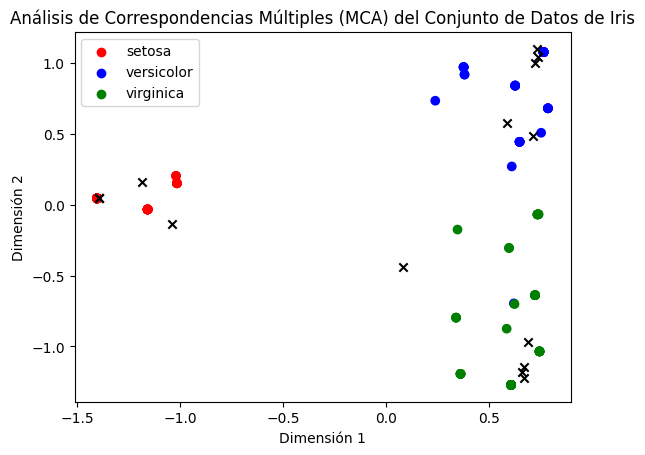

In [ ]:
import matplotlib.pyplot as plt

# Graficar las coordenadas de las filas
plt.scatter(rows_coords[0], rows_coords[1], c=iris['species'].apply(lambda x: {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}[x]))

# Agregar leyendas para las especies
for species, color in {'setosa': 'red', 'versicolor': 'blue', 'virginica': 'green'}.items():
    plt.scatter([], [], c=color, label=species)

# Graficar las coordenadas de las columnas
plt.scatter(cols_coords[0], cols_coords[1], color='black', marker='x')

plt.title('Análisis de Correspondencias Múltiples (MCA) del Conjunto de Datos de Iris')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.legend()
plt.show()


## Ejercicio 5

(1) Calcula la matriz de disimilaridades.

In [ ]:
import numpy as np

# Definir los puntos
puntos = np.array([[0, 0], [0, 1], [-1, 2], [2, 0], [3, 0], [4, -1]])

# Calcular la matriz de disimilaridades
def distancia_euclidiana(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

num_puntos = len(puntos)
matriz_disimilaridades = np.zeros((num_puntos, num_puntos))

for i in range(num_puntos):
    for j in range(num_puntos):
        matriz_disimilaridades[i, j] = distancia_euclidiana(puntos[i], puntos[j])

print("Matriz de disimilaridades:")
print(matriz_disimilaridades)

Matriz de disimilaridades:
[[0.         1.         2.23606798 2.         3.         4.12310563]
 [1.         0.         1.41421356 2.23606798 3.16227766 4.47213595]
 [2.23606798 1.41421356 0.         3.60555128 4.47213595 5.83095189]
 [2.         2.23606798 3.60555128 0.         1.         2.23606798]
 [3.         3.16227766 4.47213595 1.         0.         1.41421356]
 [4.12310563 4.47213595 5.83095189 2.23606798 1.41421356 0.        ]]


(2) Realiza un K-means. Usa (0, 0) y (4,-1) como centroides iniciales (K = 2). ¿A que cluster perteneceal punto (1, 1)?

In [ ]:
from sklearn.cluster import KMeans

# Definir los puntos
puntos = np.array([[0, 0], [0, 1], [-1, 2], [2, 0], [3, 0], [4, -1]])

# Definir los centroides iniciales
centroides_iniciales = np.array([[0, 0], [4, -1]])

# Crear el modelo K-means
modelo = KMeans(n_clusters=2, init=centroides_iniciales, n_init=1, random_state=42)

# Ajustar el modelo a los datos
modelo.fit(puntos)

# Obtener los centroides finales y las etiquetas de clúster
centroides_finales = modelo.cluster_centers_
etiquetas = modelo.labels_

print("Centroides finales:")
print(centroides_finales)
print("Etiquetas de los puntos:")
print(etiquetas)

# Punto (1, 1)
punto = np.array([[1, 1]])
cluster_punto = modelo.predict(punto)

print("El punto (1, 1) pertenece al clúster:", cluster_punto)

##Ejercicio 8

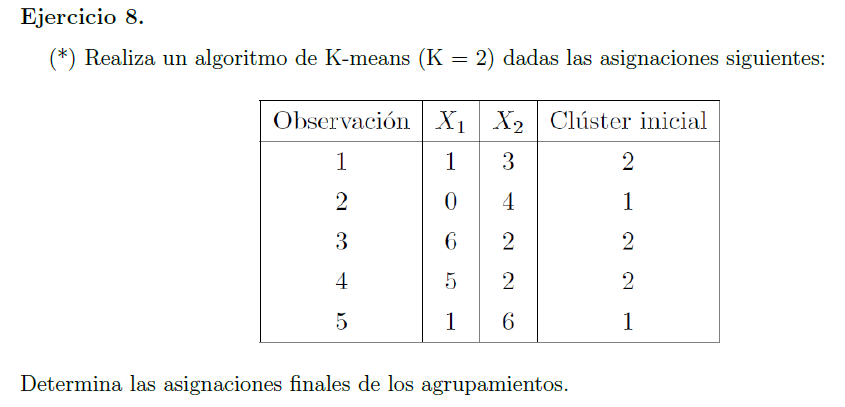

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Centroides:
[[0.66666667 4.33333333]
 [5.5        2.        ]]
Etiquetas de los clusters:
[0 0 1 1 0]


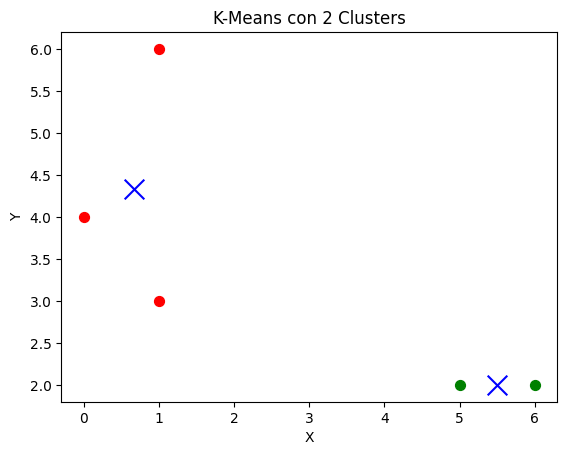

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Supongamos que este es tu conjunto de puntos en R^2
points = np.array([
    [1, 3], [0, 4], [6, 2],
    [5, 2], [1, 6]
])

# Crear el modelo k-means con 2 clusters
kmeans = KMeans(n_clusters=2)

# Ajustar el modelo a los datos
kmeans.fit(points)

# Obtener las coordenadas de los centroides
centroids = kmeans.cluster_centers_

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Imprimir los resultados
print("Centroides:")
print(centroids)
print("Etiquetas de los clusters:")
print(labels)

# Visualización de los clusters
colors = ['r', 'g']

for i in range(len(points)):
    plt.scatter(points[i][0], points[i][1], c=colors[labels[i]], s=50)

plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='b')   #Centroide que minimiza la distancia para el grupo de puntos
plt.title('K-Means con 2 Clusters')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


##Ejercicio 9

(1) Usando el algoritmo de k-means, agrupa puntos en 3-clústers.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

puntos=np.array([[2, 10],[2, 5],[8, 4],[5, 8],[7, 5],[6, 4],[1, 2],[4, 9]])
num_clusters = 3

kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(puntos)
clusters = kmeans.labels_
centroides = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(puntos[:, 0], puntos[:, 1], c=clusters, cmap='viridis', marker='o', edgecolors='black')
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='X', s=100, label='Centroides')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Clústers - K-means')
plt.legend()
plt.show()

(2)Realiza un análisis de clúster usando single-link, complete-link y average-link para agrupar los puntos dados

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

puntos = np.array([[2, 10], [2, 5], [8, 4], [5, 8], [7, 5], [6, 4], [1, 2], [4, 9]])

# Función para graficar dendrograma
def plot_dendrogram(Z, title):
    plt.figure(figsize=(10, 7))
    plt.title(title)
    dendrogram(Z)
    plt.xlabel('Índice de Muestra')
    plt.ylabel('Distancia')
    plt.show()

# Análisis de clúster con single-link (mínima distancia)
Z_single = linkage(puntos, method='single')
plot_dendrogram(Z_single, 'Dendrograma - Single Link')

# Análisis de clúster con complete-link (máxima distancia)
Z_complete = linkage(puntos, method='complete')
plot_dendrogram(Z_complete, 'Dendrograma - Complete Link')

# Análisis de clúster con average-link (distancia promedio)
Z_average = linkage(puntos, method='average')
plot_dendrogram(Z_average, 'Dendrograma - Average Link')

# Asignación de clústers
clusters_single = fcluster(Z_single, t=1, criterion='maxclust')
clusters_complete = fcluster(Z_complete, t=1, criterion='maxclust')
clusters_average = fcluster(Z_average, t=1, criterion='maxclust')

df = pd.DataFrame({
    'Punto': [str(point) for point in puntos],
    'Single Link': clusters_single,
    'Complete Link': clusters_complete,
    'Average Link': clusters_average})

print(df.to_string(index=False))

def plot_clusters(puntos, labels, title):
    plt.scatter(puntos[:, 0], puntos[:, 1], c=labels, cmap='viridis', marker='o')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.show()

plot_clusters(puntos, clusters_single, 'Clústers - Single Link')
plot_clusters(puntos, clusters_complete, 'Clústers - Complete Link')
plot_clusters(puntos, clusters_average, 'Clústers - Average Link')

##Ejercicio 10

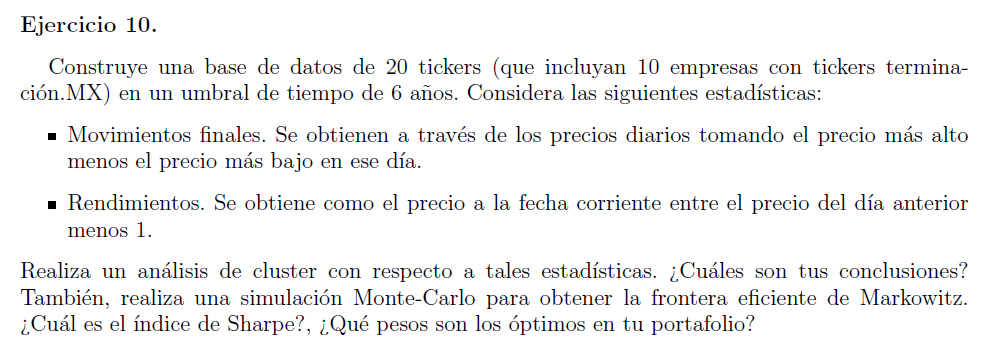

In [ ]:
pip install yahoo_fin

In [ ]:
import yahoo_fin as yfin
import yahoo_fin.stock_info as si
import pandas as pd
import numpy as np
from datetime import datetime
import statistics
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from pandas_datareader import data

In [ ]:
#EXTRAEMOS DE YAHOO FINANCE LOS DATOS HISTORICOS DE LAS ACCIONES QUE VAN A CONFORMAR EL PORTAFOLIO

#10 MEXICANAS
AMXL_s_t = si.get_data("AMX", start_date = "05/20/2018", end_date = "05/20/2024")
BIMBOA_s_t = si.get_data("BIMBOA.MX", start_date = "05/20/2018", end_date = "05/20/2024")
CEMEXCPO_s_t = si.get_data("CEMEXCPO.MX", start_date = "05/20/2018", end_date = "05/20/2024")
FEMSABUD_s_t = si.get_data("FEMSAUBD.MX", start_date = "05/20/2018", end_date = "05/20/2024")
GMEXICOB_s_t = si.get_data("GMEXICOB.MX", start_date = "05/20/2018", end_date = "05/20/2024")
KIMBERAJ_s_t = si.get_data("KIMBERA.MX", start_date = "05/20/2018", end_date = "05/20/2024")
PEOLES_s_t = si.get_data("PE&OLES.MX", start_date = "05/20/2018", end_date = "05/20/2024")
TLEVISACPO_s_t = si.get_data("TLEVISACPO.MX", start_date = "05/20/2018", end_date = "05/20/2024")
ALSEA_s_t = si.get_data("ALSEA.MX", start_date = "05/20/2018", end_date = "05/20/2024")
WALMEX_s_t = si.get_data("WALMEX.MX", start_date = "05/20/2018", end_date = "05/20/2024")

#10 INTERNACIONALES
AMZN_s_t = si.get_data("AMZN", start_date = "05/20/2018", end_date = "05/20/2024")
IBM_s_t = si.get_data("IBM", start_date = "05/20/2018", end_date = "05/20/2023")
AAPL_s_t = si.get_data("AAPL", start_date = "05/20/2018", end_date = "05/20/2023")
MSFT_s_t = si.get_data("MSFT", start_date = "05/20/2018", end_date = "05/20/2023")
TSLA_s_t = si.get_data("TSLA", start_date = "05/20/2018", end_date = "05/20/2023")
ORCL_s_t = si.get_data("ORCL", start_date = "05/20/2018", end_date = "05/20/2023")
JNJ_s_t = si.get_data("JNJ", start_date = "05/20/2018", end_date = "05/20/2023")
GM_s_t = si.get_data("GM", start_date = "05/20/2018", end_date = "05/20/2023")
BABA_s_t = si.get_data("BABA", start_date = "05/20/2018", end_date = "05/20/2023")
GOOGL_s_t = si.get_data("GOOGL", start_date = "05/20/2018", end_date = "05/20/2023")

In [ ]:
#CREAMOS UNA TABLA CON LOS PRECIOS DE CIERRE AJUSTADOS DE CADA ACCIÓN
portafolio = pd.concat([AMXL_s_t["adjclose"],BIMBOA_s_t["adjclose"],CEMEXCPO_s_t["adjclose"],FEMSABUD_s_t["adjclose"],GMEXICOB_s_t["adjclose"],KIMBERAJ_s_t["adjclose"],PEOLES_s_t["adjclose"],TLEVISACPO_s_t["adjclose"],ALSEA_s_t["adjclose"],WALMEX_s_t["adjclose"],AMZN_s_t["adjclose"],IBM_s_t["adjclose"],AAPL_s_t["adjclose"],MSFT_s_t["adjclose"],TSLA_s_t["adjclose"],ORCL_s_t["adjclose"],JNJ_s_t["adjclose"],GM_s_t["adjclose"],BABA_s_t["adjclose"],GOOGL_s_t["adjclose"]], axis=1)
portafolio.columns = ["AMXL","BIMBOA","CEMEXCPO","FEMSAUBD","GMEXICOB","KIMBERAJ","PE%OLES","TLEVISACPO","ALSEA","WALMEX","AMZN","IBM","AAPL","MSFT","TSLA","ORCL","JNJ","GM","BABA","GOOGL"]
portafolio.head()

,AMXL,BIMBOA,CEMEXCPO,FEMSAUBD,GMEXICOB,KIMBERAJ,PE%OLES,TLEVISACPO,ALSEA,WALMEX,AMZN,IBM,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA,GOOGL
2018-05-21,13.884892,35.110901,11.589793,141.908691,40.258835,23.644999,310.274475,65.804726,68.359413,45.111877,79.273003,104.464989,44.591515,91.593361,18.966000,42.848164,104.239067,34.416672,195.018433,54.200500
2018-05-22,14.057914,35.970161,11.609288,142.079880,41.094860,24.365005,322.393951,66.630844,67.818436,45.443920,79.070000,104.177795,44.479824,91.499504,18.334000,42.085777,103.556610,34.588348,193.271912,53.765499
2018-05-23,14.317444,36.226112,11.609288,142.182617,39.747131,24.717810,325.566833,66.260513,68.359413,46.449287,80.093002,103.876228,44.765011,92.588120,18.604668,42.566803,104.011574,34.199814,194.189575,54.298000
2018-05-24,14.109819,36.025009,11.472823,141.069870,38.896698,23.904202,316.712372,66.289001,66.982384,46.476959,80.153503,103.445412,44.715111,92.259659,18.523333,42.167461,103.000557,34.687740,194.752014,54.272499
2018-05-25,13.997355,34.717831,11.453328,139.529129,38.312927,23.947401,318.640106,65.776230,67.425003,46.569191,80.507500,103.136642,44.817295,92.306572,18.590000,42.657570,103.102402,34.606415,196.557739,54.203999


<Axes: >

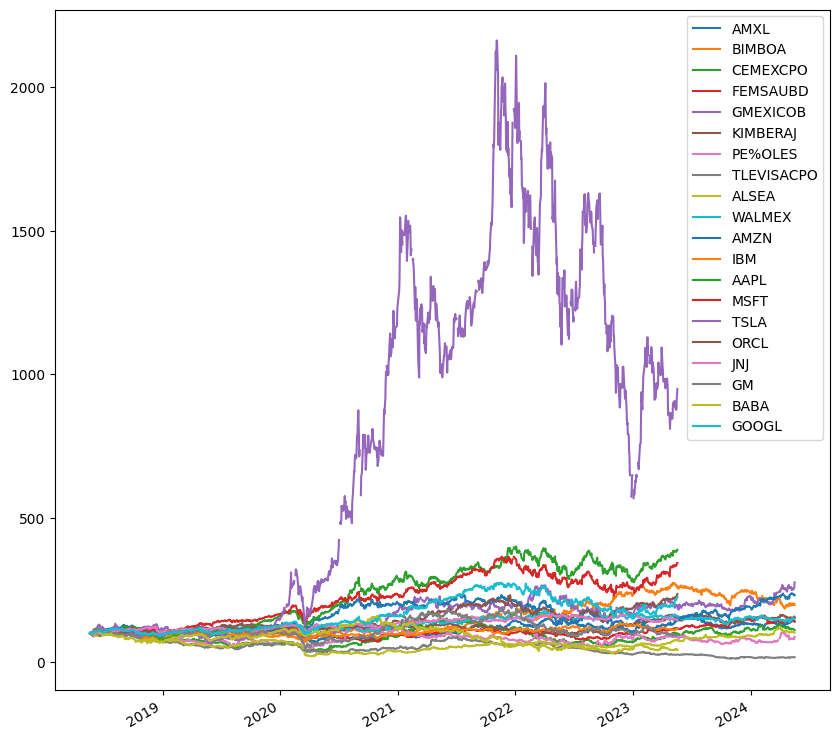

In [ ]:
(portafolio/portafolio.iloc[0]*100).plot(figsize=(10,10))

In [ ]:
list_portafolio = ["AMXL","BIMBOA","CEMEXCPO","FEMSAUBD","GMEXICOB","KIMBERAJ","PE&OLES","TLEVISACPO","ALSEA","WALMEX","TSLA","ORCL","JNJ","GM","BABA","GOOGL"]

In [ ]:
def calcular_retornos(portafolio):
    return portafolio.pct_change()

In [ ]:
retornos = calcular_retornos(portafolio)
retornos.dropna()
retornos.sum()

AMXL          0.629260
BIMBOA        1.007006
CEMEXCPO      0.574519
FEMSAUBD      0.516770
GMEXICOB      1.439305
KIMBERAJ      0.674837
PE%OLES       0.478808
TLEVISACPO   -1.216880
ALSEA         0.461139
WALMEX        0.612860
AMZN          1.214153
IBM           0.338933
AAPL          1.640254
MSFT          1.479181
TSLA          3.354557
ORCL          1.075338
JNJ           0.487582
GM            0.386215
BABA         -0.278669
GOOGL         1.071509
dtype: float64

In [ ]:
retornos

,AMXL,BIMBOA,CEMEXCPO,FEMSAUBD,GMEXICOB,KIMBERAJ,PE%OLES,TLEVISACPO,ALSEA,WALMEX,AMZN,IBM,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA,GOOGL
2018-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-22,0.012461,0.024473,0.001682,0.001207,0.020766,0.030451,0.039061,0.012554,-0.007914,0.007360,-0.002561,-0.002749,-0.002505,-0.001025,-0.033323,-0.017793,-0.006547,0.004989,-0.008956,-0.008026
2018-05-23,0.018461,0.007116,0.000000,0.000723,-0.032795,0.014480,0.009842,-0.005558,0.007977,0.022123,0.012938,-0.002895,0.006412,0.011898,0.014763,0.011430,0.004393,-0.011233,0.004748,0.009904
2018-05-24,-0.014501,-0.005551,-0.011755,-0.007826,-0.021397,-0.032916,-0.027197,0.000430,-0.020144,0.000596,0.000755,-0.004147,-0.001115,-0.003548,-0.004372,-0.009382,-0.009720,0.014267,0.002896,-0.000470
2018-05-25,-0.007971,-0.036285,-0.001699,-0.010922,-0.015008,0.001807,0.006087,-0.007735,0.006608,0.001985,0.004416,-0.002985,0.002285,0.000509,0.003599,0.011623,0.000989,-0.002344,0.009272,-0.001262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-13,-0.014874,0.007446,0.002252,0.012225,-0.014355,0.005758,0.001232,0.000898,0.005500,-0.009845,-0.004854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-05-14,0.000000,-0.009949,-0.005243,-0.010373,0.011827,-0.002726,-0.007818,-0.006278,-0.011781,-0.018424,0.002680,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-05-15,0.003523,0.012920,-0.008283,-0.000197,0.007728,-0.000273,0.016479,0.010830,-0.000142,0.011917,-0.005773,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2024-05-16,-0.010532,0.012755,-0.006834,-0.009893,0.011215,0.027071,-0.016251,-0.007143,0.002981,0.005447,-0.012689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
def retornos_log(portafolio):
  return np.log(portafolio) - np.log(portafolio.shift(1))

In [ ]:
log_retornos = retornos_log(portafolio)
log_retornos = log_retornos.dropna()
log_retornos.sum()

AMXL          0.323564
BIMBOA        0.785031
CEMEXCPO      0.025663
FEMSAUBD      0.238678
GMEXICOB      0.774494
KIMBERAJ      0.166252
PE%OLES       0.174419
TLEVISACPO   -1.436319
ALSEA         0.076057
WALMEX        0.267674
AMZN          0.288025
IBM           0.129053
AAPL          1.645598
MSFT          1.256824
TSLA          2.036305
ORCL          0.967362
JNJ           0.488761
GM            0.022835
BABA         -0.554698
GOOGL         0.863177
dtype: float64

In [ ]:
#PROMEDIO DE LOS RETORNOS

In [ ]:
log_retornos

,AMXL,BIMBOA,CEMEXCPO,FEMSAUBD,GMEXICOB,KIMBERAJ,PE%OLES,TLEVISACPO,ALSEA,WALMEX,AMZN,IBM,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA,GOOGL
2018-05-22,0.012384,0.024178,0.001681,0.001206,0.020553,0.029996,0.038317,0.012476,-0.007945,0.007333,-0.002564,-0.002753,-0.002508,-0.001025,-0.033891,-0.017953,-0.006568,0.004976,-0.008996,-0.008058
2018-05-23,0.018293,0.007091,0.000000,0.000723,-0.033345,0.014376,0.009794,-0.005573,0.007945,0.021882,0.012855,-0.002899,0.006391,0.011827,0.014655,0.011365,0.004384,-0.011297,0.004737,0.009855
2018-05-24,-0.014607,-0.005567,-0.011824,-0.007857,-0.021629,-0.033470,-0.027574,0.000430,-0.020350,0.000595,0.000755,-0.004156,-0.001116,-0.003554,-0.004381,-0.009426,-0.009768,0.014166,0.002892,-0.000470
2018-05-25,-0.008002,-0.036960,-0.001701,-0.010982,-0.015122,0.001805,0.006068,-0.007765,0.006586,0.001983,0.004407,-0.002989,0.002283,0.000508,0.003593,0.011556,0.000988,-0.002347,0.009229,-0.001263
2018-05-30,-0.003198,0.014102,-0.000852,0.024455,-0.009233,0.008403,0.005826,-0.013855,-0.002281,-0.019026,0.007425,0.009865,-0.002131,0.009545,0.027666,0.016933,0.013063,0.011967,-0.000101,0.008762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-15,0.027107,-0.002386,-0.009536,0.000000,0.027356,-0.006613,0.045539,0.000588,0.017041,-0.019357,0.008489,0.004224,-0.002902,0.001585,-0.009751,-0.006048,-0.007680,-0.000926,0.034550,-0.008546
2023-05-16,0.006555,-0.006617,0.004346,0.000451,-0.005578,0.002294,-0.020112,0.007609,-0.014801,0.001788,0.019591,0.000810,0.000000,0.007341,0.001021,0.010127,-0.001317,-0.025976,0.004743,0.025423
2023-05-17,-0.008310,-0.021841,0.007775,-0.005256,0.002734,-0.007410,0.006928,0.020774,-0.006545,-0.006894,0.018349,0.018060,0.003597,0.009407,0.043135,0.015352,-0.002199,0.028136,0.021401,0.011067
2023-05-18,-0.014599,0.012417,0.002578,0.010037,-0.005833,-0.002311,-0.012454,0.016426,-0.031640,-0.003742,0.022684,0.003494,0.013574,0.014292,0.017278,0.025433,-0.003213,0.014080,-0.055668,0.016334


<Axes: >

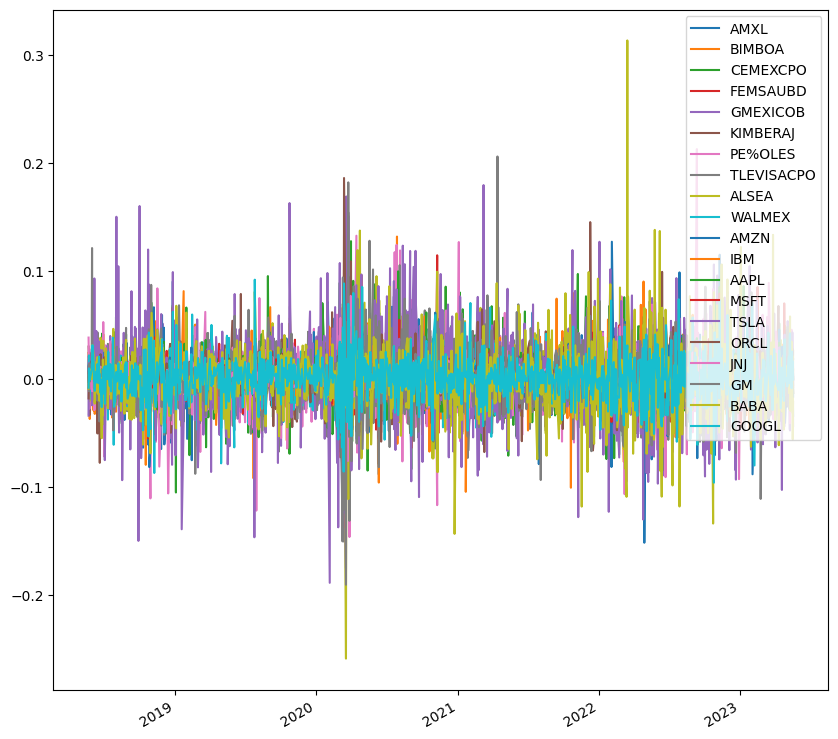

In [ ]:
log_retornos.plot(figsize=(10,10))

In [ ]:
#ASIGNACIÓN DE PESOS DE MANERA ALEATORIA
num_stocks = len(list_portafolio)
random_array = np.random.random(num_stocks)

In [ ]:
#DEFINIMOS QUE LA SUMA DE LOS PESOS DEBEN DAR 1
pesos = np.random.random(num_stocks)
pesos /= np.sum(pesos)

In [ ]:
pesos

array([0.04288762, 0.08272701, 0.01668712, 0.08543492, 0.07449716,
       0.16865555, 0.15728828, 0.20658056, 0.16524178])

In [ ]:
#CALCULO DEL RETORNO
np.sum(pesos*log_retornos.mean())*250 #250 sesiones en un año

0.08121133242402453

In [ ]:
#CALCULO DE VARIANZA
varianza = np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos)) #haciendo uso del producto punto


In [ ]:
volatilidad = np.sqrt(varianza)
volatilidad

0.24743253289458844

In [ ]:
#SIMULACIONES

retornos_portafolio = []
volatilidades_portafolio = []
for x in range (1000):
  pesos = np.random.random(num_stocks)
  pesos /= np.sum(pesos)
  retornos_portafolio.append(np.sum(pesos*log_retornos.mean())*250)
  volatilidades_portafolio.append(np.sqrt(np.dot(pesos.T,np.dot(log_retornos.cov()*250,pesos))))

In [ ]:
retornos_portafolio = np.array(retornos_portafolio)
volatilidades_portafolio = np.array(volatilidades_portafolio)
portafolios2 = pd.DataFrame({"Retorno":retornos_portafolio,"Volatilidad":volatilidades_portafolio})
portafolios2.tail()

,Retorno,Volatilidad
995,0.171788,0.251013
996,0.113139,0.241874
997,0.108466,0.262468
998,0.137737,0.278445
999,0.155855,0.265799


Text(0, 0.5, 'Retorno')

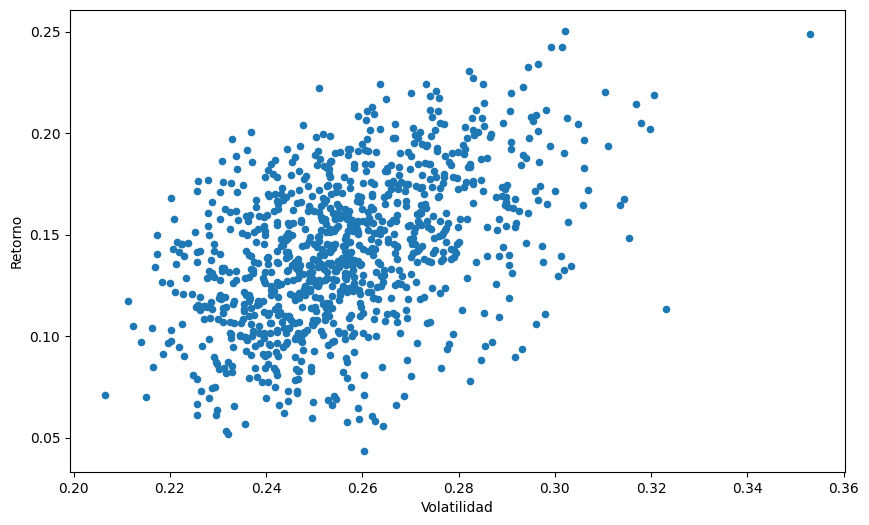

In [ ]:
#Graficamos la frontera eficiente

portafolios2.plot(x="Volatilidad",y="Retorno",kind="scatter",figsize=(10,6))
plt.xlabel("Volatilidad")
plt.ylabel("Retorno")

In [ ]:
#Calculamos los retornos esperados

RetornosE = pd.DataFrame(log_retornos.mean()) #obtenemos el promedio de cada acción
RetornosE

,0
IBM,0.000417
AMZN,0.000451
AAPL,0.001174
MSFT,0.001017
TSLA,0.001847
ORCL,0.000768
JNJ,0.000134
GM,-0.000146
BABA,-0.000574


In [ ]:
#Calculamos el riesgo individual

RiesgoI = pd.DataFrame(log_retornos.std()) #obtenemos la desviación estandar de cada acción
RiesgoI

,0
IBM,0.016781
AMZN,0.022634
AAPL,0.020590
MSFT,0.019473
TSLA,0.041037
ORCL,0.019053
JNJ,0.012946
GM,0.026573
BABA,0.030126


In [ ]:
#Realizamos la matriz de varianza y covarianza

datacov = log_retornos.select_dtypes(include=["float64","int"])
corr_matrix = datacov.corr(method="pearson")
corr_matrix

,IBM,AMZN,AAPL,MSFT,TSLA,ORCL,JNJ,GM,BABA
IBM,1.000000,0.299769,0.449281,0.455849,0.206164,0.497549,0.485668,0.473621,0.204649
AMZN,0.299769,1.000000,0.631653,0.691038,0.442187,0.413915,0.245076,0.322928,0.361822
AAPL,0.449281,0.631653,1.000000,0.765467,0.497747,0.526108,0.409781,0.429308,0.379628
MSFT,0.455849,0.691038,0.765467,1.000000,0.466137,0.587777,0.425739,0.422988,0.352723
TSLA,0.206164,0.442187,0.497747,0.466137,1.000000,0.244354,0.122684,0.377731,0.325805
ORCL,0.497549,0.413915,0.526108,0.587777,0.244354,1.000000,0.409268,0.404700,0.260783
JNJ,0.485668,0.245076,0.409781,0.425739,0.122684,0.409268,1.000000,0.258215,0.139442
GM,0.473621,0.322928,0.429308,0.422988,0.377731,0.404700,0.258215,1.000000,0.316858
BABA,0.204649,0.361822,0.379628,0.352723,0.325805,0.260783,0.139442,0.316858,1.000000


In [ ]:
#CALCULAMOS EL RENDIMIENTO ESPERADO DEL PORTAFOLIO

pesos = np.random.random(9) #Asignamos pesos aleatorios a cada acción
pesos /= np.sum(pesos)
pesos

array([6.28053734e-03, 1.20278222e-01, 1.65794956e-01, 1.82172923e-04,
       5.86307363e-02, 2.03814611e-01, 6.38067978e-02, 1.78681325e-01,
       2.02530642e-01])

In [ ]:
RetE = RetornosE.iloc[:, 0].values
print(RetE)

[ 0.00041705  0.00045057  0.00117442  0.00101721  0.00184745  0.00076784
  0.00013364 -0.00014616 -0.00057355]


In [ ]:
np.matmul(pesos,RetE) #Rendimiento esperado del portafolio

0.0003827741268005514

In [ ]:
#CALCULAMOS LA VARIANZA DEL PORTAFOLIO

transpesos = pesos.transpose()
SxW = np.dot(corr_matrix, transpesos)
VARP = np.matmul(pesos,SxW)
VARP

0.47728316681923133

In [ ]:
#CALCULAMOS EL RIESGO INDIVIDUAL DEL PORTAFOLIO
RIP = np.sqrt(VARP)
RIP

0.69085683525549

In [ ]:
#INSTALAMOS LA PAQUETERÍA PyPortfolioOpt y las funciones para resolver problemas de frontera eficiente
!pip install PyPortfolioOpt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 2.4 MB/s eta 0:00:00


In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
#Usamos la función EfficientFrontier para calcular los portafolios óptimos, con la condición de que los pesos deben
#ser positivos
ef = EfficientFrontier(RetE,corr_matrix,weight_bounds=(0,1))
#Obtenemos los pesos que nos generen la mínima volatilidad
w = ef.min_volatility()
c_w = ef.clean_weights()
c_w

OrderedDict([('IBM', 0.09856),
             ('AMZN', 0.09636),
             ('AAPL', 0.0),
             ('MSFT', 0.0),
             ('TSLA', 0.19151),
             ('ORCL', 0.08677),
             ('JNJ', 0.22249),
             ('GM', 0.09974),
             ('BABA', 0.20457)])

#Análisis De Clúster#

In [ ]:
comp_df = {
    'AMXL':'AMX',
    'BIMBOA':"BIMBOA.MX",
    "CEMEXCPO":"CEMEXCPO.MX",
    "FEMSAUBD":"FEMSAUBD.MX",
    "GMEXICOB":"GMEXICOB.MX",
    "KIMBERA":"KIMBERA.MX",
    "PE&OLES":"PE&OLES.MX",
    "TLEVISACPO":"TLEVISACPO.MX",
    "ALSEA":"ALSEA.MX",
    "WALMEX":"WALMEX.MX",
    'Amazon':'AMZN',
    'IBM':'IBM',
    'Apple':'AAPL',
    'Microsoft':'MSFT',
    'Tesla':'TSLA',
    'Oracle':'ORCL',
    'Johnson & Johnson':'JNJ',
    'General Motors':"GM",
    'Biba':'BABA',
    'Google':'GOOGL'
                      }

In [ ]:
tickers = list(comp_df.values())

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import numpy as np
import plotly.graph_objects as go

In [ ]:
df = yf.download(tickers, start='2018-05-20', end= "2024-05-20")
df

[*********************100%%**********************]  20 of 20 completed


Price        Adj Close                                                \
Ticker            AAPL   ALSEA.MX        AMX        AMZN        BABA   
Date                                                                   
2018-05-21   44.591537  68.359413  13.884892   79.273003  195.018433   
2018-05-22   44.479836  67.818436  14.057912   79.070000  193.271912   
2018-05-23   44.764999  68.359413  14.317442   80.093002  194.189575   
2018-05-24   44.715107  66.982384  14.109818   80.153503  194.752014   
2018-05-25   44.817295  67.425003  13.997354   80.507500  196.557739   
...                ...        ...        ...         ...         ...   
2024-05-13  186.279999  71.300003  19.870001  186.570007   84.599998   
2024-05-14  187.429993  70.459999  19.870001  187.070007   79.510002   
2024-05-15  189.720001  70.449997  19.940001  185.990005   80.989998   
2024-05-16  189.839996  70.660004  19.730000  183.630005   86.699997   
2024-05-17  189.869995  70.220001  19.750000  184.699997   88.540001   

Price                                                                 ...  \
Ticker      BIMBOA.MX CEMEXCPO.MX FEMSAUBD.MX         GM GMEXICOB.MX  ...   
Date                                                                  ...   
2018-05-21  35.110901   11.589793  141.908676  34.416668   40.258842  ...   
2018-05-22  35.970161   11.609288  142.079910  34.588348   41.094864  ...   
2018-05-23  36.226116   11.609288  142.182617  34.199814   39.747135  ...   
2018-05-24  36.025005   11.472824  141.069870  34.687737   38.896694  ...   
2018-05-25  34.717834   11.453329  139.529144  34.606415   38.312931  ...   
...               ...         ...         ...        ...         ...  ...   
2024-05-13  70.360001   13.350000  205.350006  45.169998  101.413406  ...   
2024-05-14  69.660004   13.280000  203.220001  45.029999  102.612801  ...   
2024-05-15  70.559998   13.170000  203.179993  45.490002  103.405792  ...   
2024-05-16  71.459999   13.080000  201.169998  45.869999  104.565536  ...   
2024-05-17  69.889999   12.890000  199.029999  45.759998  111.603317  ...   

Price           Volume                                                \
Ticker           GOOGL        IBM        JNJ  KIMBERA.MX        MSFT   
Date                                                                   
2018-05-21  25180000.0  3027856.0  5558700.0   1668132.0  19422500.0   
2018-05-22  22226000.0  2389064.0  7172700.0   1879442.0  15441200.0   
2018-05-23  23740000.0  3618846.0  4940800.0   2208489.0  21251200.0   
2018-05-24  20604000.0  3555040.0  6923600.0  12723561.0  26649300.0   
2018-05-25  22224000.0  5140358.0  4594800.0   1413039.0  18363900.0   
...                ...        ...        ...         ...         ...   
2024-05-13  31327600.0  2414900.0  5628500.0   1149520.0  15440200.0   
2024-05-14  25127100.0  2601000.0  8254200.0   8441968.0  15109300.0   
2024-05-15  26948400.0  4468800.0  5548000.0   2104888.0  22239500.0   
2024-05-16  27867900.0  3492300.0  7591000.0   3599879.0  17530100.0   
2024-05-17  24479300.0  2956400.0  6521800.0   7451309.0  15352200.0   

Price                                                                     
Ticker            ORCL PE&OLES.MX TLEVISACPO.MX         TSLA   WALMEX.MX  
Date                                                                      
2018-05-21  13416300.0   200438.0     1708487.0  137739000.0  14914552.0  
2018-05-22  18505100.0   444240.0     4320030.0  134187000.0  10329772.0  
2018-05-23   9204400.0   261481.0     2445002.0   89776500.0  11276002.0  
2018-05-24  12497700.0   133433.0     1610745.0   62650500.0  10804260.0  
2018-05-25  11354300.0   233506.0     1856062.0   58126500.0  15241899.0  
...                ...        ...           ...          ...         ...  
2024-05-13   4140000.0   150697.0     2728484.0   67018900.0  14583702.0  
2024-05-14  17811200.0   185659.0      685313.0   86407400.0  14760832.0  
2024-05-15   6604600.0   279874.0     1625612.0   79663000.0  11500471.0  
202

In [ ]:
df.isna().sum()

Price      Ticker       
Adj Close  AAPL             42
           ALSEA.MX         41
           AMX              42
           AMZN             42
           BABA             42
                            ..
Volume     ORCL             42
           PE&OLES.MX       41
           TLEVISACPO.MX    41
           TSLA             42
           WALMEX.MX        41
Length: 120, dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

Price      Ticker       
Adj Close  AAPL             0
           ALSEA.MX         0
           AMX              0
           AMZN             0
           BABA             0
                           ..
Volume     ORCL             0
           PE&OLES.MX       0
           TLEVISACPO.MX    0
           TSLA             0
           WALMEX.MX        0
Length: 120, dtype: int64

In [ ]:
df

Price        Adj Close                                                \
Ticker            AAPL   ALSEA.MX        AMX        AMZN        BABA   
Date                                                                   
2018-05-21   44.591537  68.359413  13.884892   79.273003  195.018433   
2018-05-22   44.479836  67.818436  14.057912   79.070000  193.271912   
2018-05-23   44.764999  68.359413  14.317442   80.093002  194.189575   
2018-05-24   44.715107  66.982384  14.109818   80.153503  194.752014   
2018-05-25   44.817295  67.425003  13.997354   80.507500  196.557739   
...                ...        ...        ...         ...         ...   
2024-05-13  186.279999  71.300003  19.870001  186.570007   84.599998   
2024-05-14  187.429993  70.459999  19.870001  187.070007   79.510002   
2024-05-15  189.720001  70.449997  19.940001  185.990005   80.989998   
2024-05-16  189.839996  70.660004  19.730000  183.630005   86.699997   
2024-05-17  189.869995  70.220001  19.750000  184.699997   88.540001   

Price                                                                 ...  \
Ticker      BIMBOA.MX CEMEXCPO.MX FEMSAUBD.MX         GM GMEXICOB.MX  ...   
Date                                                                  ...   
2018-05-21  35.110901   11.589793  141.908676  34.416668   40.258842  ...   
2018-05-22  35.970161   11.609288  142.079910  34.588348   41.094864  ...   
2018-05-23  36.226116   11.609288  142.182617  34.199814   39.747135  ...   
2018-05-24  36.025005   11.472824  141.069870  34.687737   38.896694  ...   
2018-05-25  34.717834   11.453329  139.529144  34.606415   38.312931  ...   
...               ...         ...         ...        ...         ...  ...   
2024-05-13  70.360001   13.350000  205.350006  45.169998  101.413406  ...   
2024-05-14  69.660004   13.280000  203.220001  45.029999  102.612801  ...   
2024-05-15  70.559998   13.170000  203.179993  45.490002  103.405792  ...   
2024-05-16  71.459999   13.080000  201.169998  45.869999  104.565536  ...   
2024-05-17  69.889999   12.890000  199.029999  45.759998  111.603317  ...   

Price           Volume                                                \
Ticker           GOOGL        IBM        JNJ  KIMBERA.MX        MSFT   
Date                                                                   
2018-05-21  25180000.0  3027856.0  5558700.0   1668132.0  19422500.0   
2018-05-22  22226000.0  2389064.0  7172700.0   1879442.0  15441200.0   
2018-05-23  23740000.0  3618846.0  4940800.0   2208489.0  21251200.0   
2018-05-24  20604000.0  3555040.0  6923600.0  12723561.0  26649300.0   
2018-05-25  22224000.0  5140358.0  4594800.0   1413039.0  18363900.0   
...                ...        ...        ...         ...         ...   
2024-05-13  31327600.0  2414900.0  5628500.0   1149520.0  15440200.0   
2024-05-14  25127100.0  2601000.0  8254200.0   8441968.0  15109300.0   
2024-05-15  26948400.0  4468800.0  5548000.0   2104888.0  22239500.0   
2024-05-16  27867900.0  3492300.0  7591000.0   3599879.0  17530100.0   
2024-05-17  24479300.0  2956400.0  6521800.0   7451309.0  15352200.0   

Price                                                                     
Ticker            ORCL PE&OLES.MX TLEVISACPO.MX         TSLA   WALMEX.MX  
Date                                                                      
2018-05-21  13416300.0   200438.0     1708487.0  137739000.0  14914552.0  
2018-05-22  18505100.0   444240.0     4320030.0  134187000.0  10329772.0  
2018-05-23   9204400.0   261481.0     2445002.0   89776500.0  11276002.0  
2018-05-24  12497700.0   133433.0     1610745.0   62650500.0  10804260.0  
2018-05-25  11354300.0   233506.0     1856062.0   58126500.0  15241899.0  
...                ...        ...           ...          ...         ...  
2024-05-13   4140000.0   150697.0     2728484.0   67018900.0  14583702.0  
2024-05-14  17811200.0   185659.0      685313.0   86407400.0  14760832.0  
2024-05-15   6604600.0   279874.0     1625612.0   79663000.0  11500471.0  
202

In [ ]:
stock_open = np.array(df['Open']).T
stock_close = np.array(df['Close']).T
movements = stock_close - stock_open
sum_of_movement = stock_close - stock_open
for i in range(len(comp_df)):
 print('company:{}, Change:{}'.format(df['High'].columns[i],sum_of_movement[i]))

company:AAPL, Change:[-0.09249878 -0.30500031  0.50249863 ...  1.80999756 -0.63000488
  0.36000061]
company:ALSEA.MX, Change:[ 2.30000305 -0.68000031  0.83999634 ... -0.90000153 -0.23999786
 -0.41999817]
company:AMX, Change:[-0.40000153  0.01000023  0.47999954 ... -0.02999878 -0.06000137
 -0.03000069]
company:AMZN, Change:[ 0.02300262 -0.42449951  1.54050446 ...  0.02000427 -1.97000122
  0.94000244]
company:BABA, Change:[-0.16000366 -2.43000793  2.91999817 ...  0.59999847  4.73999786
  0.94000244]
company:BIMBOA.MX, Change:[-0.11000061  0.79999924  0.17000198 ...  0.33999634  0.95999908
 -1.38999939]
company:CEMEXCPO.MX, Change:[ 0.27000046  0.06999969  0.05999947 ... -0.10999966 -0.03999996
 -0.21999931]
company:FEMSAUBD.MX, Change:[ 1.78999329 -2.50999451 -1.88000488 ...  0.17999268 -2.08999634
 -1.97000122]
company:GM, Change:[-0.06999969 -0.30000305 -0.33000183 ... -0.00999832  0.48999786
 -0.31000137]
company:GMEXICOB.MX, Change:[-0.04000092  0.88000107 -1.0399971  ... -0.30000305

In [ ]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
norm_movements = normalizer.fit_transform(movements)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans

normalizer = Normalizer()

kmeans = KMeans(n_clusters = 10,max_iter = 1000)

pipeline = make_pipeline(normalizer,kmeans)

pipeline.fit(movements)
predictions = pipeline.predict(movements)
labels=predictions

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
df1 = pd.DataFrame({'labels':labels,'companies':list(companies_dict)}).sort_values(by=['labels'],axis = 0)
df1

,labels,companies
4,0,GMEXICOB
0,1,AMXL
15,1,Oracle
3,1,FEMSAUBD
14,1,Tesla
10,1,Amazon
18,1,Biba
16,2,Johnson & Johnson
9,2,WALMEX
6,3,PE&OLES


In [ ]:
from sklearn.decomposition import PCA

normalizer = Normalizer()

reduced_data = PCA(n_components = 2)

kmeans = KMeans(n_clusters = 10,max_iter = 1000)

pipeline = make_pipeline(normalizer,reduced_data,kmeans)

pipeline.fit(movements)

predictions = pipeline.predict(movements)

df2 = pd.DataFrame({'labels':labels,'companies':list(comp_df.keys())}).sort_values(by=['labels'],axis = 0)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<Figure size 640x480 with 0 Axes>

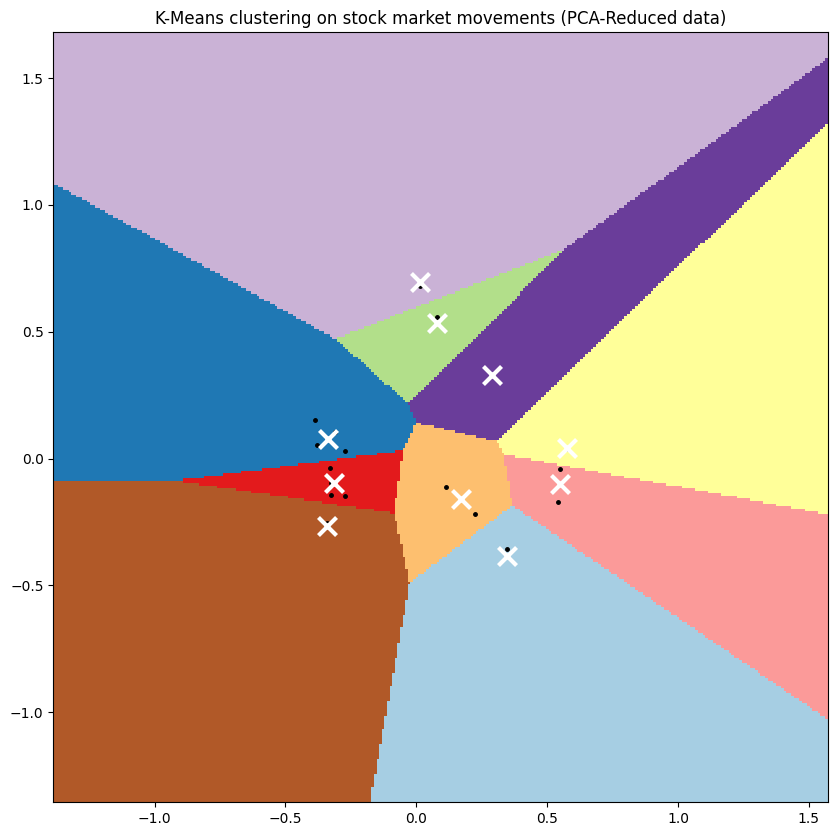

In [ ]:
from sklearn.decomposition import PCA

reduced_data = PCA(n_components = 2).fit_transform(norm_movements)

h = 0.01

x_min,x_max = reduced_data[:,0].min()-1, reduced_data[:,0].max() + 1
y_min,y_max = reduced_data[:,1].min()-1, reduced_data[:,1].max() + 1
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = kmeans.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)

cmap = plt.cm.Paired

plt.clf()
plt.figure(figsize=(10,10))
plt.imshow(Z,interpolation = 'nearest',extent=(xx.min(),xx.max(),yy.min(),yy.max()),cmap = cmap,aspect = 'auto',origin = 'lower')
plt.plot(reduced_data[:,0],reduced_data[:,1],'k.',markersize = 5)

centroids = kmeans.cluster_centers_
plt.scatter(centroids[:,0],centroids[:,1],marker = 'x',s = 169,linewidths = 3,color = 'w',zorder = 10)
plt.title('K-Means clustering on stock market movements (PCA-Reduced data)')
plt.xlim(x_min,x_max)
plt.ylim(y_min,y_max)
plt.show()